In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Hypothesis testing: Chi-Square Test within the Eniac case study

In this notebook we perform a chi-square test with the data from the Eniac case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.

* Null Hypothesis: all versions have the same CTR.
* Alternative Hypothesis: there is at least one difference in the CTR for the different versions.





## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

It was decided that a relatively high alpha was acceptable in this case

In [ ]:
alpha = 0.05

## 3.&nbsp; Collect data that is random and independent

The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them. Where are the .csv files?

In [ ]:
# eniac_a.csv
url = "https://drive.google.com/file/d/1D4zQxV45clmABNEQPxoJTy5QNR3DY3Fi/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_a = pd.read_csv(path)

# eniac_b.csv
url = "https://drive.google.com/file/d/1EFNXACdbJB_NXANl21w_nUvgaAii6nsQ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_b = pd.read_csv(path)

# eniac_c.csv
url = "https://drive.google.com/file/d/1TR9dilxKq8YW6N4C4so3RUoo0lSrLGpY/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_c = pd.read_csv(path)

# eniac_d.csv
url = "https://drive.google.com/file/d/1s8G_KeK1XZiIcnsfZZRD4qU0qjqYK8Oh/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_d = pd.read_csv(path)

In [ ]:
eniac_a

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


# Find out the total number of visitors in each case

In [ ]:
eniac_a_clicks = eniac_a.loc[eniac_a['Name']== 'SHOP NOW','No. clicks']
eniac_a_clicks

,No. clicks
21,512


In [ ]:
eniac_a_clicks = eniac_a.loc[eniac_a['Name']== 'SHOP NOW','No. clicks'].iloc[0]
eniac_a_clicks

np.int64(512)

In [ ]:
eniac_a_clicks = eniac_a.loc[eniac_a['Name']== 'SHOP NOW','No. clicks'].iloc[0]
eniac_b_clicks = eniac_b.loc[eniac_b['Name']== 'SHOP NOW','No. clicks'].iloc[0]
eniac_c_clicks = eniac_c.loc[eniac_c['Name']== 'SEE DEALS','No. clicks'].iloc[0]
eniac_d_clicks = eniac_d.loc[eniac_d['Name']== 'SEE DEALS','No. clicks'].iloc[0]

**How many visits did each page get (they are in the last column of the second row, we read them manually)?**

In [ ]:
eniac_a.iloc[1,-1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [ ]:
eniac_b.iloc[1,-1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks'

In [ ]:
eniac_c.iloc[1,-1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks'

In [ ]:
eniac_d.iloc[1,-1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks'

In [ ]:
eniac_a_visits = 25326
eniac_b_visits = 24747
eniac_c_visits = 24876
eniac_d_visits = 25233

## From the above information, we can calculate the number of visitors who didn't click on the button

In [ ]:
eniac_a_no_click = eniac_a_visits - eniac_a_clicks
eniac_b_no_click = eniac_b_visits - eniac_b_clicks
eniac_c_no_click = eniac_c_visits - eniac_c_clicks
eniac_d_no_click = eniac_d_visits - eniac_d_clicks

## **Now** we can make a contingency table that shows the clicks and no clicks for each version of the website

In [ ]:
clicks = [eniac_a_clicks, eniac_b_clicks, eniac_c_clicks, eniac_d_clicks]
noclicks = [eniac_a_no_click, eniac_b_no_click, eniac_c_no_click, eniac_d_no_click]

observed_results = pd.DataFrame(data = [clicks, noclicks],
                                columns = ["Version_A", "Version_B", "Version_C", "Version_D"],
                                index = ["Click", "No-click"])

observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


## 4.&nbsp; Calculate the test result

In [ ]:
chisq, pvalue, dof, expected = stats.chi2_contingency(observed_results)

In [ ]:
chisq

np.float64(224.01877488058412)

In [ ]:
pvalue

np.float64(2.7161216607868712e-48)

In [ ]:
dof

3

In [ ]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

## 5.&nbsp; Interpret the test result

**If p is low, the null must go!**

In [ ]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


## How do we decide who's the winner?

In [ ]:
0.95**6 # for 95% confidence level

0.7350918906249998

In [ ]:
alpha = 0.05
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations #= 0.05/6
alpha_post_hoc

0.008333333333333333

In [ ]:
1-alpha_post_hoc

0.9916666666666667

In [ ]:
(1-alpha_post_hoc)**6

0.9510301646897641

## Before we begin, let's have a look at the click through rates to see the relative success of each version

In [ ]:
# click-through rates
eniac_a_ctr = eniac_a_clicks / eniac_a_visits
eniac_b_ctr = eniac_b_clicks / eniac_b_visits
eniac_c_ctr = eniac_c_clicks / eniac_c_visits
eniac_d_ctr = eniac_d_clicks / eniac_d_visits

# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

,rates,names
2,0.021185,Version_C
0,0.020216,Version_A
1,0.011355,Version_B
3,0.007649,Version_D


It appears that the two white buttons have achieved the highest level of success. However, to gain a comprehensive understanding of statistical significance, we will conduct a post hoc test across all versions. Nonetheless, our primary emphasis should be on analysing the discrepancy between the white "SEE DEALS" and the white "SHOP NOW" buttons, as well as the disparity between these two and the remaining versions.

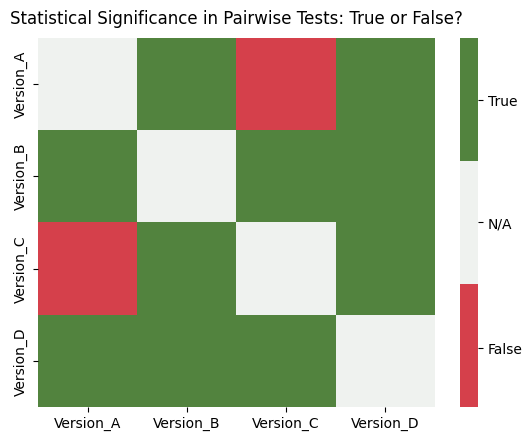

In [ ]:
# @title
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Version_A": [],
                        "Version_B": [],
                        "Version_C": [],
                        "Version_D": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # if testing against self, set value to 2 for different color
    if i==j:
      stat_significant_dict[i].append(0.5)
      continue # skip to the next j
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(1.0 if pvalue < alpha_post_hoc else 0.0)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=3, s=70, l=50)

# change diagonals values

ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.16,0.5 ,0.83])
colorbar.set_ticklabels(['False', 'N/A','True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

Analysing our heatmap, it is evident that the version with the highest click-through rate, `Version_C`, exhibits a statistically significant difference when compared Versions B and D, but not to `Version_A`, which possesses the second-highest click-through rate. As a result, declaring a clear winner based on post hoc tests becomes challenging, therefore we can only say that both `Version_C` and `Version_A` are the winners.


However, if a definitive winner is needed, it is essential to implement additional steps that bridge the gap between statistical analysis and business decision-making. The following actions can aid in determining which version should be prominently featured on the website moving forward:

- **Evaluate Additional Metrics**: To look beyond click-through rates and consider other relevant performance indicators, such as conversion rates, user engagement, and customer satisfaction scores.
  
- **Incorporate Qualitative Insights**: To utilize qualitative research findings, such as user feedback and usability testing, to gain a deeper understanding of user preferences and behaviors.

- **Consult Subject-Matter Experts**: To get engaged with experts in relevant fields to gather insights and perspectives that can inform your decision-making process.

- **Redesign and Retest**: If necessary, we have to refine the experiment by adjusting variables or testing new hypotheses, and conducting the A/B test again to ensure robust and reliable results.

By taking these steps, we can make more informed decisions that align with both statistical evidence and business objectives.